# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ru_5min_PriceThreshold_NoCost -c ../Config/Ru_5min_PriceThreshold_NoCost.json > /dev/null

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ru - 5min 

In [2]:
Ru_5min_result = GetResult("../Results/Ru_5min_PriceThreshold_NoCost/")


Tester= 0 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ru_5min_PriceThreshold_NoCost/Result_11.pkl

Tester= 12 |file_path =  ../Results/Ru_5min_Pri

## 1.0 Ru - 5min offset average - group test results by price threshold

In [39]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [3]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[], 5:[], 10:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ru_5min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# NO trading cost

## 1.1 Ru --- 5min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

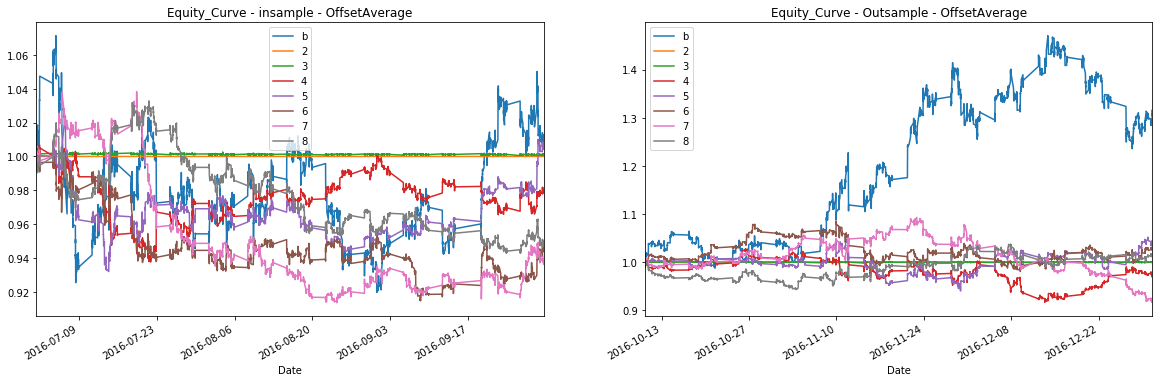

In [4]:
Ru_5min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ru_5min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ru_5min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [5]:
Ru_5min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.108359,0.000018,NaN,NaN,0.000587,-0.001981,0.003155,-0.055116,NaN,0.016059,1.4,0.996666,0.100000
2,0.221763,-0.000293,NaN,NaN,-0.001819,-0.030845,0.032690,-0.129360,NaN,-0.257542,72.4,0.974331,0.268303
3,0.318847,0.000111,-0.006915,0.008327,0.000094,-0.035585,0.043950,-0.166668,1.219588,0.132947,204.2,1.000381,0.453124
4,0.304747,-0.000854,-0.005811,0.007022,-0.000203,-0.028814,0.043420,-0.201044,1.217892,-0.792756,261.8,0.943800,0.433187
5,0.295046,-0.000981,-0.004854,0.005298,-0.000161,-0.027292,0.036941,-0.191444,1.094531,-0.822990,398.2,0.932116,0.454728
6,0.284810,-0.000764,-0.004459,0.004535,-0.000097,-0.027969,0.031603,-0.191989,1.018310,-0.612886,495.0,0.945493,0.474399


In [6]:
Ru_5min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.188495,-0.000006,NaN,NaN,-0.000185,-0.060414,0.060044,-0.102325,NaN,-0.014940,1.4,1.007863,0.100000
2,0.356150,-0.000424,NaN,NaN,-0.028332,-0.085515,0.052016,-0.213617,NaN,-0.246653,114.4,0.966870,0.276182
3,0.412823,0.000732,-0.007835,0.009850,0.000118,-0.050596,0.061711,-0.224515,1.302911,0.685781,281.4,1.069144,0.450177
4,0.395174,0.000515,-0.006793,0.008168,0.000118,-0.045632,0.050359,-0.243702,1.206975,0.382485,379.2,1.018392,0.458489
5,0.407776,-0.001379,-0.005933,0.006523,-0.000171,-0.044301,0.047211,-0.241970,1.110620,-0.890419,521.6,0.911996,0.456864
6,0.431576,0.000259,-0.005556,0.005859,0.000041,-0.059144,0.052126,-0.210644,1.055639,0.156778,605.0,1.025728,0.484524


## 2.2  Ru --- 5min offset average --- price threshold = 10

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

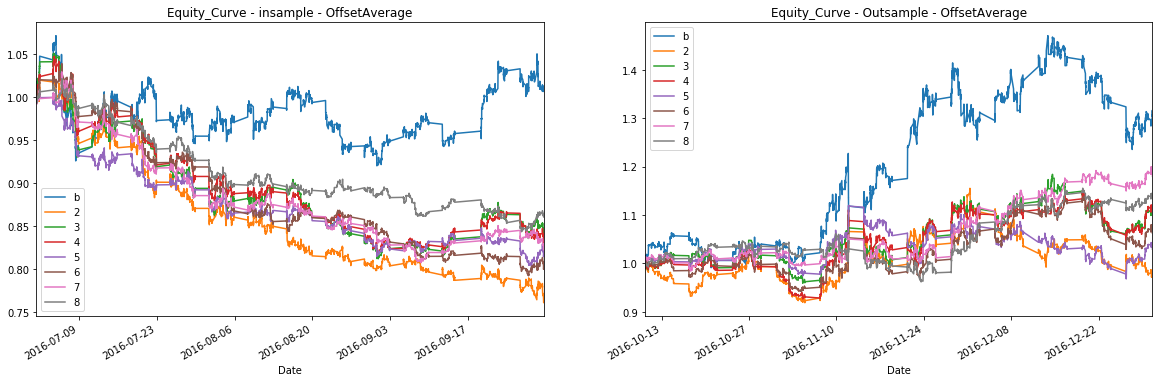

In [7]:
Ru_5min_Offset_Average_10d = OffSetAverage(NoCost_Result_Group[10])

Benchmark = Ru_5min_Offset_Average_10d.GetBenchmark()
AveEqCurve = Ru_5min_Offset_Average_10d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [8]:
Ru_5min_Offset_Average_10d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.239366,-0.004146,-0.001752,0.002580,-0.000128,-0.019655,0.028285,-0.274448,1.473019,-4.338700,2071.2,0.760519,0.354428
1,0.285191,-0.002649,-0.002078,0.002220,-0.000081,-0.025210,0.026754,-0.244861,1.070784,-2.296985,2094.8,0.839551,0.431194
2,0.287642,-0.002780,-0.002028,0.002296,-0.000086,-0.021916,0.028285,-0.235654,1.139974,-2.341820,2120.4,0.835838,0.422143
3,0.272512,-0.003103,-0.001974,0.002137,-0.000083,-0.022918,0.023386,-0.238553,1.082686,-2.804515,2380.0,0.815889,0.426346
4,0.284992,-0.003415,-0.001991,0.002182,-0.000094,-0.025394,0.026701,-0.271223,1.097972,-2.918474,2302.6,0.797897,0.426329
5,0.269715,-0.002970,-0.002038,0.002246,-0.000087,-0.024479,0.024830,-0.242879,1.102357,-2.711431,2176.8,0.820035,0.428274
6,0.279814,-0.002235,-0.002097,0.002229,-0.000068,-0.026223,0.024409,-0.214864,1.063973,-2.023752,2129.6,0.859023,0.441376


In [9]:
Ru_5min_Offset_Average_10d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.444046,-0.000279,-0.002371,0.003582,-0.000008,-0.025746,0.055689,-0.182539,1.511749,-0.196356,1963.2,0.964735,0.384671
1,0.432484,0.001796,-0.002728,0.003185,0.000055,-0.036060,0.051795,-0.184788,1.172747,0.883785,1985.4,1.116000,0.451917
2,0.451073,0.001913,-0.002737,0.003304,0.000058,-0.038366,0.051648,-0.181475,1.213511,1.108784,2014.0,1.116404,0.447210
3,0.419543,0.000625,-0.002698,0.003035,0.000010,-0.040592,0.046732,-0.200218,1.128649,0.286080,2248.6,1.035243,0.453529
4,0.450862,0.001148,-0.002722,0.003177,0.000029,-0.034770,0.050919,-0.189955,1.169625,0.584491,2179.0,1.052173,0.451979
5,0.435396,0.002870,-0.002791,0.003209,0.000084,-0.032473,0.051808,-0.161448,1.150938,1.680215,2070.6,1.164224,0.465422
6,0.413396,0.002261,-0.002936,0.003195,0.000066,-0.031785,0.043759,-0.183863,1.090921,1.357795,2032.0,1.120346,0.476414


## 2.3  Ru --- 5min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

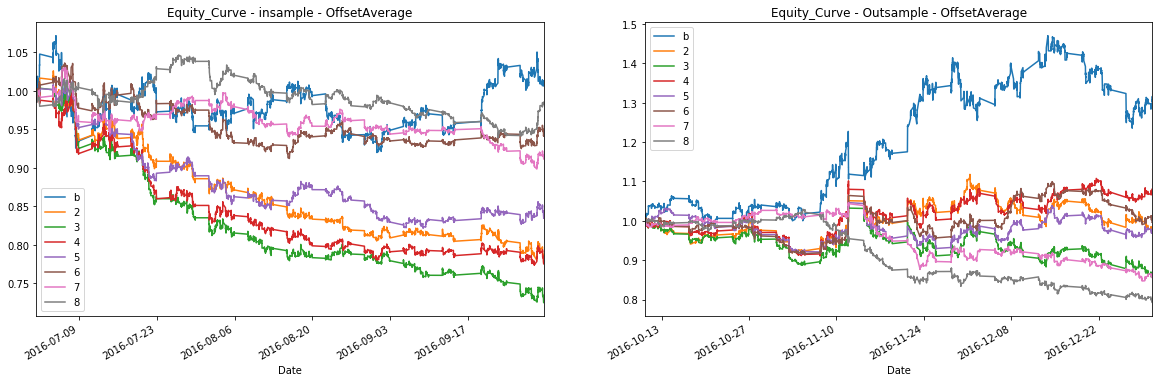

In [10]:
Ru_5min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ru_5min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ru_5min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [11]:
Ru_5min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.259548,-0.003840,-0.001860,0.002745,-0.000130,-0.020900,0.028285,-0.260790,1.478473,-3.762218,1889.2,0.777563,0.354337
1,0.267535,-0.004902,-0.001778,0.002292,-0.000133,-0.020652,0.030717,-0.300530,1.289907,-4.579398,2341.6,0.725960,0.378099
2,0.277634,-0.003860,-0.001855,0.002354,-0.000104,-0.020503,0.030003,-0.268071,1.269094,-3.486447,2306.8,0.777959,0.392835
3,0.284147,-0.002771,-0.001979,0.002364,-0.000082,-0.022209,0.028306,-0.248181,1.194967,-2.557988,2142.6,0.833662,0.411954
4,0.280606,-0.000896,-0.002113,0.002489,-0.000029,-0.020424,0.029776,-0.186358,1.179341,-0.768136,1931.6,0.937072,0.429286
5,0.280153,-0.001406,-0.002312,0.002530,-0.000054,-0.021248,0.031822,-0.185007,1.094791,-1.239147,1686.6,0.905512,0.444037
6,0.298465,-0.000226,-0.002553,0.002739,-0.000011,-0.024586,0.030884,-0.170599,1.074097,-0.207266,1395.8,0.975757,0.462469


In [12]:
Ru_5min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.440373,-0.000184,-0.002454,0.003715,-4.964159e-06,-0.024749,0.057093,-0.197166,1.516302,-0.224372,1848.8,0.982334,0.385669
1,0.451211,-0.002288,-0.002397,0.003226,-6.238721e-05,-0.027597,0.057689,-0.235657,1.346407,-1.484435,2190.6,0.868698,0.399601
2,0.436539,0.001439,-0.002513,0.003364,3.886345e-05,-0.029069,0.054650,-0.168698,1.339557,0.815366,2192.6,1.081195,0.420416
3,0.467222,-0.000320,-0.002719,0.003237,-1.192647e-05,-0.030002,0.061559,-0.254145,1.195187,-0.052503,2080.8,1.002086,0.440324
4,0.482656,0.000056,-0.002948,0.003400,2.746275e-07,-0.030529,0.050659,-0.202230,1.155355,-0.028157,1904.8,0.983435,0.450671
5,0.477688,-0.002506,-0.003345,0.003435,-9.070193e-05,-0.044989,0.041389,-0.296340,1.027929,-1.341706,1652.8,0.844538,0.467030
6,0.396486,-0.003706,-0.003771,0.003646,-1.617427e-04,-0.045428,0.041855,-0.308836,0.968431,-2.380688,1375.0,0.785592,0.475111


## 2.4  Ru --- 5min offset average --- price threshold = 5

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

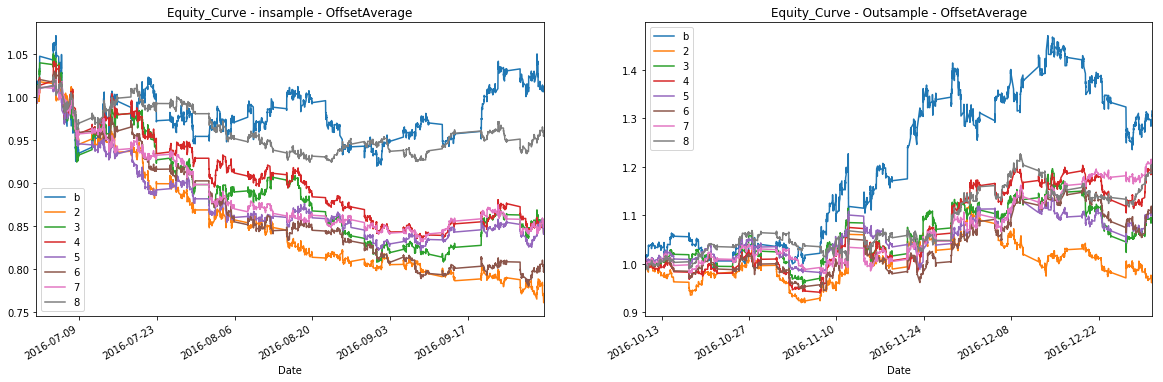

In [13]:
Ru_5min_Offset_Average_5d = OffSetAverage(NoCost_Result_Group[5])

Benchmark = Ru_5min_Offset_Average_5d.GetBenchmark()
AveEqCurve = Ru_5min_Offset_Average_5d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [14]:
Ru_5min_Offset_Average_5d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.239613,-0.004130,-0.001753,0.002561,-0.000128,-0.019655,0.028285,-0.272650,1.461663,-4.308701,2075.4,0.761355,0.356135
1,0.291559,-0.002559,-0.002049,0.002262,-0.000079,-0.025436,0.029092,-0.241970,1.104677,-2.137648,2066.0,0.845593,0.422661
2,0.282211,-0.002575,-0.002091,0.002270,-0.000079,-0.022872,0.028285,-0.219219,1.092301,-2.149996,2096.4,0.845815,0.434778
3,0.272763,-0.002607,-0.002002,0.002213,-0.000072,-0.023869,0.026631,-0.226981,1.105858,-2.347723,2269.2,0.841235,0.426777
4,0.266210,-0.003436,-0.002000,0.002181,-0.000095,-0.022688,0.027390,-0.272797,1.091640,-3.158851,2313.6,0.799844,0.427582
5,0.251832,-0.002459,-0.002006,0.002234,-0.000070,-0.024118,0.026380,-0.226970,1.113857,-2.399923,2246.8,0.847151,0.429208
6,0.261208,-0.000635,-0.002017,0.002236,-0.000019,-0.024229,0.023113,-0.171285,1.110781,-0.398943,2192.8,0.958311,0.442069


In [16]:
Ru_5min_Offset_Average_5d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.431461,-0.000463,-0.002372,0.003570,-0.000014,-0.025746,0.055689,-0.191578,1.506290,-0.345551,1970.6,0.957273,0.384847
1,0.433608,0.001622,-0.002674,0.003240,0.000051,-0.032257,0.055689,-0.186416,1.212030,0.852893,1969.6,1.097471,0.441440
2,0.460367,0.003088,-0.002764,0.003306,0.000095,-0.043803,0.047383,-0.176874,1.200069,1.590782,1985.2,1.208961,0.455774
3,0.448106,0.001797,-0.002688,0.003166,0.000047,-0.044115,0.046418,-0.162343,1.181531,0.901125,2155.2,1.095287,0.449827
4,0.454690,0.001877,-0.002701,0.003204,0.000052,-0.031725,0.050490,-0.181045,1.186133,0.971423,2184.8,1.104690,0.452384
5,0.429014,0.003210,-0.002749,0.003220,0.000096,-0.033447,0.050314,-0.155310,1.173421,1.955601,2115.4,1.195454,0.462582
6,0.455990,0.003113,-0.002829,0.003237,0.000090,-0.031876,0.057952,-0.178843,1.144938,1.689013,2082.6,1.183862,0.467149


## 2.5  Ru --- 5min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

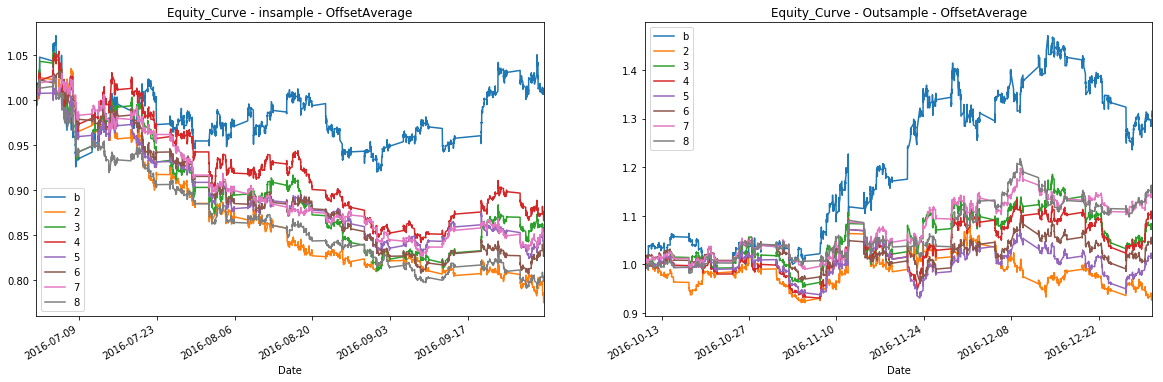

In [17]:
Ru_5min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0e-4])

Benchmark = Ru_5min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ru_5min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [18]:
Ru_5min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.242005,-0.003856,-0.001745,0.002570,-0.000119,-0.019655,0.028285,-0.268093,1.473604,-4.052933,2081.6,0.773830,0.356139
1,0.296178,-0.002469,-0.002038,0.002259,-0.000076,-0.022406,0.029092,-0.243346,1.109397,-2.044066,2082.4,0.849098,0.422289
2,0.300254,-0.002127,-0.002106,0.002262,-0.000066,-0.022054,0.028285,-0.222285,1.079704,-1.705474,2080.0,0.867770,0.439388
3,0.282540,-0.002657,-0.001973,0.002156,-0.000066,-0.020782,0.026915,-0.228616,1.093703,-2.209757,2409.2,0.842691,0.430057
4,0.275668,-0.002854,-0.001943,0.002147,-0.000074,-0.020566,0.026171,-0.256236,1.105901,-2.628082,2454.8,0.825942,0.425338
5,0.262110,-0.002533,-0.001956,0.002182,-0.000068,-0.021354,0.025890,-0.235651,1.115488,-2.256412,2384.4,0.853992,0.426762
6,0.268013,-0.003395,-0.002004,0.002164,-0.000093,-0.023513,0.025044,-0.260602,1.081921,-2.982988,2331.2,0.804888,0.429749


In [19]:
Ru_5min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.413886,-0.001077,-0.002387,0.003543,-0.000032,-0.025746,0.055689,-0.191005,1.484983,-0.687028,1975.6,0.921761,0.384987
1,0.428468,0.001441,-0.002668,0.003218,0.000044,-0.031342,0.055689,-0.193120,1.206583,0.752226,1977.2,1.095835,0.441877
2,0.468252,0.001809,-0.002830,0.003224,0.000055,-0.040838,0.049693,-0.195728,1.142097,0.839876,1972.4,1.132089,0.461012
3,0.454947,0.000439,-0.002690,0.003044,0.000003,-0.039943,0.048000,-0.219992,1.133454,0.147365,2259.2,1.033926,0.452128
4,0.430883,0.000929,-0.002651,0.003074,0.000022,-0.031622,0.039826,-0.187843,1.160501,0.534218,2322.0,1.058029,0.450384
5,0.468302,0.002281,-0.002716,0.003149,0.000065,-0.033443,0.047372,-0.154521,1.160185,1.246552,2226.4,1.129676,0.458024
6,0.502454,0.002545,-0.002785,0.003200,0.000073,-0.033647,0.052530,-0.177369,1.149810,1.214099,2172.0,1.156991,0.462482
